In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

In [2]:
df = pd.read_csv('df_clean_class.csv', index_col='Name_Short')
df.head(2)

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class
Name_Short,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both


In [3]:
df['Bioactivity_class_number'] = df['Bioactivity_class'].map({'active_both': 3, 'active_glucosidase': 2, 'active_amylase': 1, 'inactive': 0})
df['Bioactivity_class_amylase_number'] = df['Bioactivity_class_amylase'].map({'active': 1, 'inactive': 0})
df['Bioactivity_class_glucosidase_number'] = df['Bioactivity_class_glucosidase'].map({'active': 1, 'inactive': 0})
df.head(2)

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class,Bioactivity_class_number,Bioactivity_class_amylase_number,Bioactivity_class_glucosidase_number
Name_Short,,,,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both,3,1,1
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both,3,1,1


In [4]:
indices = df.index

In [5]:
plant_df = df.copy()
fingerprint_to_model = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]

In [6]:
fingerprint_to_model 

,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,
G_cowa,0,0,0,0,0,2,2,2
P_debilis,3,0,0,5,3,0,0,0
P_evecta_leaf,0,0,0,3,0,3,2,0
P_evecta_Rhizome,3,0,0,5,3,0,0,5
E_cuneatum,3,0,0,2,0,3,3,0
P_anamense,3,0,0,3,3,3,2,0
A_marginata,0,0,0,2,0,3,3,0
E_cherrevensis,5,0,1,2,0,3,0,0
F_indica,3,1,0,3,3,2,2,0


In [7]:
# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
df['Bioactivity_class_amylase']=pd.Categorical(df['Bioactivity_class_amylase'])
y = df['Bioactivity_class_amylase'].cat.codes

In [8]:
plsr=PLSRegression(n_components=2, scale=False)
plsr.fit(fingerprint_to_model, y)

PLSRegression(scale=False)

In [9]:
plsr.x_scores_

array([[ 0.44247822, -1.13499083],
       [-0.85018563,  1.56308988],
       [-1.17436465, -0.22533495],
       [ 1.6419406 ,  0.80092908],
       [ 0.01294102,  1.50770418],
       [ 1.2448213 , -0.2271575 ],
       [-0.87449905, -0.57615199],
       [ 0.75044829,  3.18486626],
       [ 0.67345577,  0.33566385],
       [ 0.23176186,  1.59249264],
       [ 0.58835878, -1.49934308],
       [-0.40443947,  0.48019741],
       [-2.24415542,  0.47214443],
       [-0.53005884, -0.53168041],
       [-0.15725297, -0.85423463],
       [ 3.5951192 ,  0.14490652],
       [ 0.34117228, -1.21710573],
       [-2.17121514,  0.50040725],
       [-0.05594702, -1.19299761],
       [-0.56652898, -1.55700865],
       [ 1.35423172, -3.03675587],
       [-0.65567821, -0.49136353],
       [-0.0316336 , -0.68411257],
       [-0.14104402, -1.94814257],
       [ 0.05346339,  3.32839242],
       [-1.6525287 ,  0.23437867],
       [-1.77409584,  0.47629914],
       [-0.28287234, -0.60347881],
       [ 1.54873913,

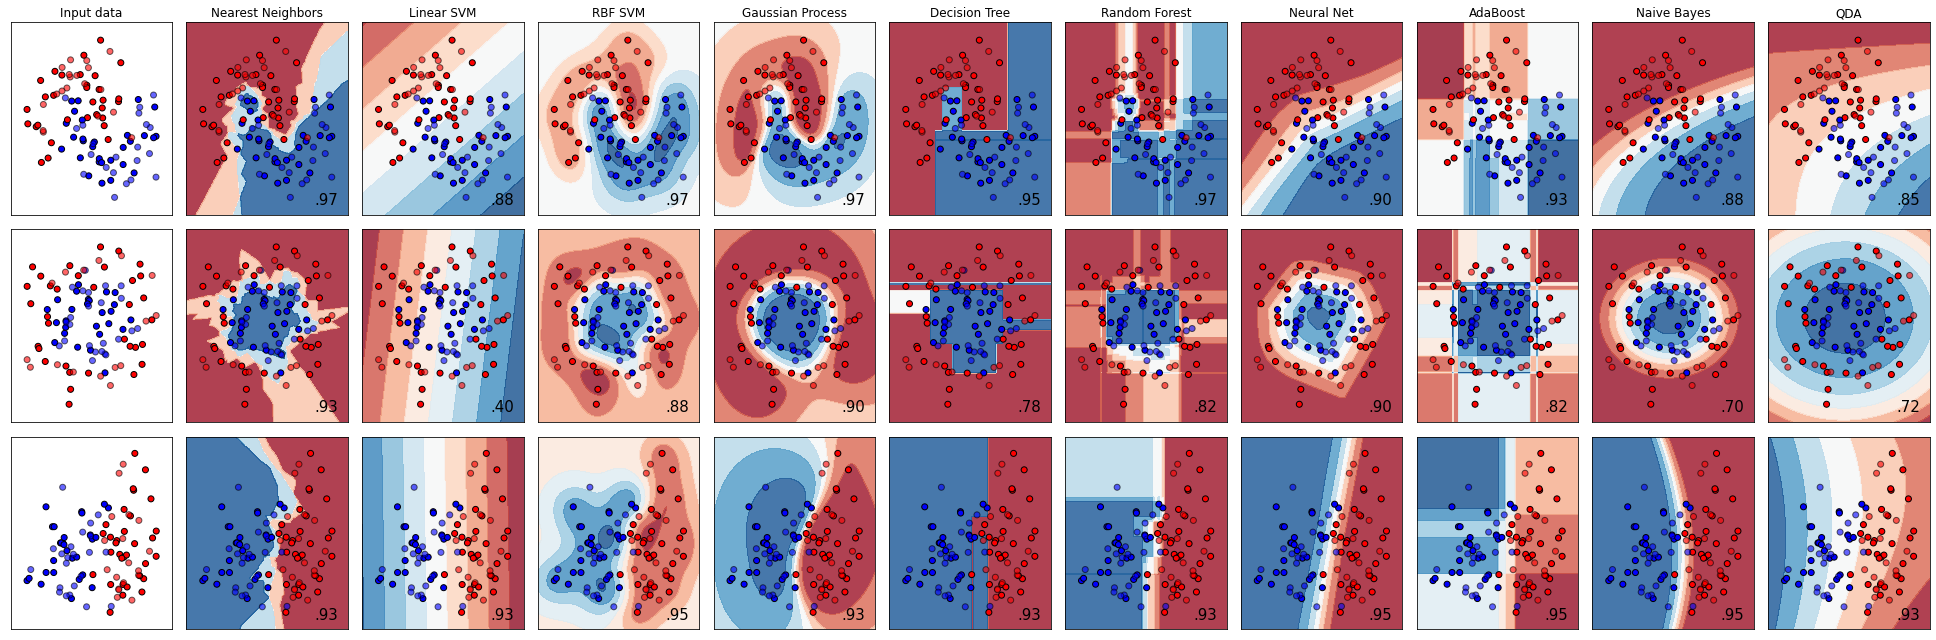

In [10]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

<function sklearn.datasets._samples_generator.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)>